In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data\heart_failure_clinical_records_dataset.csv')

***
***
# Preprocessing
***
***

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# check for missing instances

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


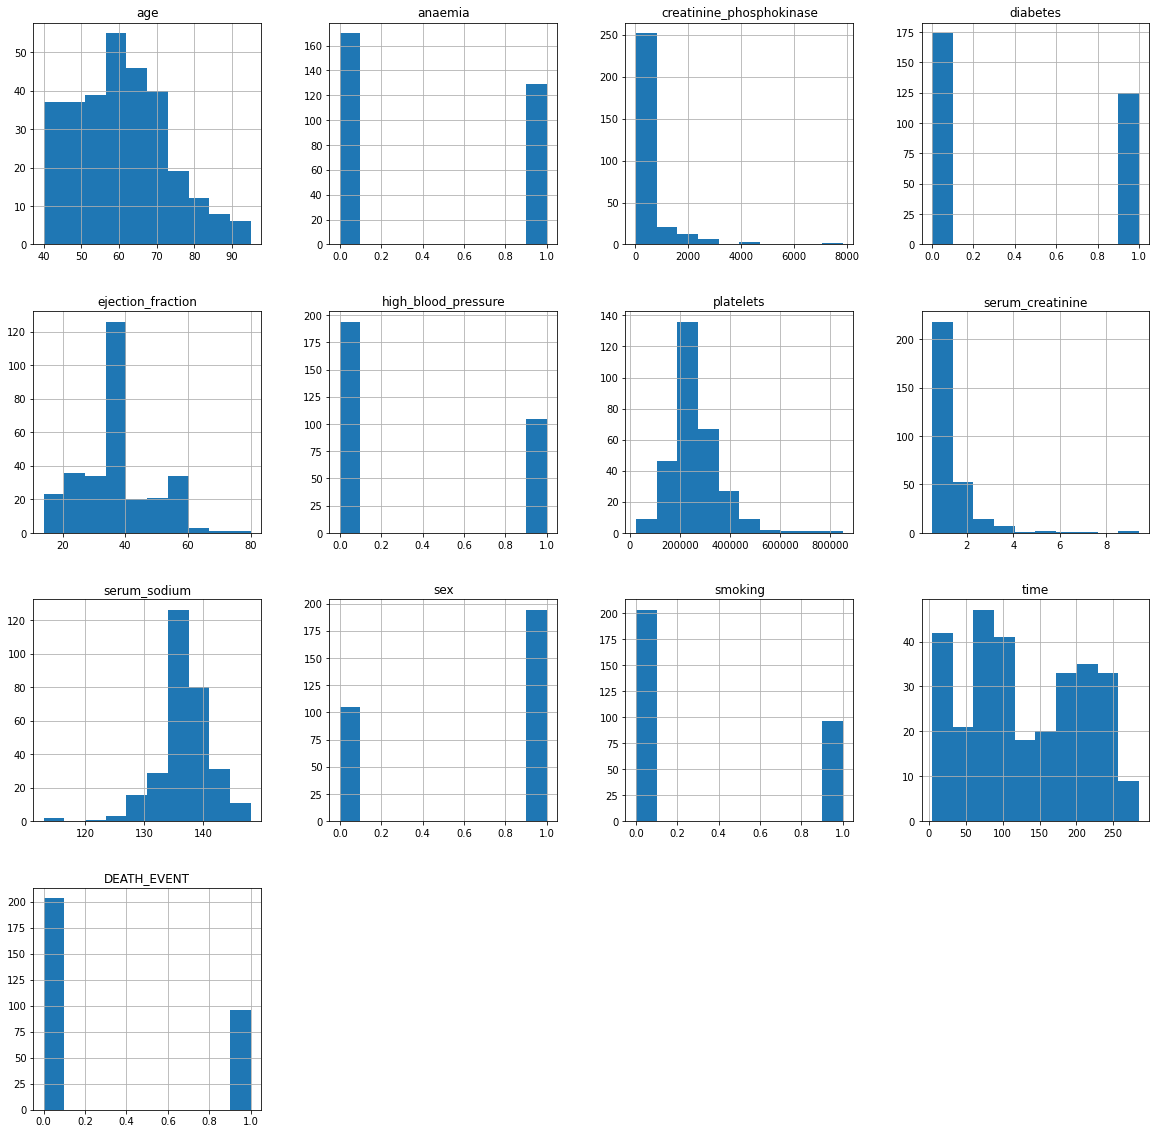

In [6]:
df.hist(figsize=(20, 20))
plt.show()

In [7]:
df.shape

(299, 13)

In [8]:
# Target Attribute separation

X_all = df.drop(columns=['DEATH_EVENT'])
y_train = df['DEATH_EVENT']

In [9]:
y_train.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Feature scaling
***

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# transform data
X_all[X_all.columns] = scaler.fit_transform(X_all)

X_all

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


In [11]:
X_train = X_all.drop(columns=['time'])

# Helpful Methods

In [41]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


def save_result(name):

    # get the list of tuples from 6 lists and merge them by using zip(). 
    list_of_tuples1 = list(zip(expt_name, run_model, precision_result, recall_result, f1_result, roc_auc_result,
                              accuracy_result)) 
    list_of_tuples2 = list(zip(expt_name, run_model, accuracy))

    # Converting lists of tuples into pandas Dataframe. 
    data1 = pd.DataFrame(list_of_tuples1, columns = ['Experiment', 'Model', 'Precision', 'Recall', 'F1', 'ROC_AUC', 'Accucary']) 
    data2 = pd.DataFrame(list_of_tuples2, columns = ['Experiment', 'Model', 'Accuracy'])
    
    data1.to_csv("data/%s.csv" %(name), index=False)
    data2.to_csv("data/accuracy/%s.csv" %(name), index=False)

    run_model.clear()
    expt_name.clear()

    precision_result.clear() 
    recall_result.clear()
    f1_result.clear() 
    roc_auc_result.clear() 
    accuracy_result.clear()
    accuracy.clear()
    
    del list_of_tuples1
    del list_of_tuples2
    del data1
    del data2


def plot_importance(columns_name, importance):

    # get the list of tuples from 2 lists and merge them by using zip(). 
    list_of_tuples = list(zip(columns_name, importance)) 

    # Converting lists of tuples into pandas Dataframe. 
    data = pd.DataFrame(list_of_tuples, columns = ['attribute', 'score']) 


    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x=abs(data.score), y=data.attribute, palette=colors_from_values(abs(data.score), "rocket_r"))
    plt.show()
    
    del list_of_tuples
    del data

In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# 10-fold stratifiedFold
cv = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

def sort_scoring(scoring):
    if scoring == 'precision':
        return make_scorer(precision_score, average = 'macro')
    elif scoring == 'f1':
        return make_scorer(f1_score, average = 'macro')
    elif scoring == 'recall':
        return make_scorer(recall_score, average = 'macro')
    elif scoring == 'roc_auc':
        return make_scorer(roc_auc_score, average = 'macro', multi_class='ovr', needs_proba=True)
    
    return scoring

In [13]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# instantiate base ZeroR model class
dummy = DummyClassifier()

# instantiate base Logistic Regression model class
lr = LogisticRegression()

# instantiate base Decision Tree model class
dt = DecisionTreeClassifier(random_state=42)

# instantiate base Naive bayes model class
nb = GaussianNB()

# instantiate base random forest model class
rf = RandomForestClassifier(random_state=42)

# instantiate base support vector machine model class
svc = SVC(probability=True)

# instantiate base k-nearest-neighbor model class
knn = KNeighborsClassifier()

# instantiate base adaBoost model class
adbst = AdaBoostClassifier(random_state=42)

# instantiate base gradient boosting model class
gb = GradientBoostingClassifier(random_state=42)

# instantiate base xgb model class
xgb = XGBClassifier(eval_metric= 'logloss')

# instantiate base xgb model class
et = ExtraTreesClassifier(random_state=42)

In [14]:
from numpy import mean, std


accuracy= []

accuracy_result= []
precision_result= []
recall_result= []
f1_result= []
roc_auc_result= []

estimator= [dummy, lr, dt, nb, rf, svc, knn, adbst, gb, xgb, et]
models_name= ['ZeroR','Logistic Regression', 'Decision Tree Classifier', 'Naive Bayes Classifier', 'Random Forest', 
              'Support Vector Machine', 'K-Nearest-Neighbor', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 
              'XGB Classifier', 'ExtraTreesClassifier']

def models(X_train, y_train, score= 'accuracy', save= False):
    
    scoring = sort_scoring(score)

    temp1= []
    temp2= []

    
    for i in range(len(models_name)):
        scores = cross_val_score(estimator[i], X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1, error_score='raise')
        print('%-30s   : %.3f (%.3f)' % (models_name[i], round(mean(scores), 3), round(std(scores), 3)))
        
        temp1.append('%.1f +/- %.1f%%' % (round(mean(scores), 3)*100, round(std(scores), 3)*100))
        temp2.append('%3.2f%%' %(round(mean(scores), 3)*100))
        
    if save:
        
        if score == 'accuracy':
            accuracy.extend(temp2)
            accuracy_result.extend(temp1)
        
        if score == 'precision':
            precision_result.extend(temp2)
        
        if score == 'recall':
            recall_result.extend(temp2)
        
        if score == 'f1':
            f1_result.extend(temp2)
        
        if score == 'roc_auc':
            roc_auc_result.extend(temp2)

    temp1.clear()
    temp2.clear()

### Results for the dataset
***

In [15]:
print('Accuracy:')
models(X_train, y_train, 'accuracy')

print('\n\nPrecision:')
models(X_train, y_train, 'precision')

print('\n\n\nRecall:')
models(X_train, y_train, 'recall')

print('\n\n\nF-measure:')
models(X_train, y_train, 'f1')

print('\n\n\nROC:')
models(X_train, y_train, 'roc_auc')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.726 (0.049)
Decision Tree Classifier         : 0.732 (0.073)
Naive Bayes Classifier           : 0.709 (0.059)
Random Forest                    : 0.736 (0.080)
Support Vector Machine           : 0.696 (0.047)
K-Nearest-Neighbor               : 0.679 (0.047)
AdaBoost Classifier              : 0.719 (0.066)
Gradient Boosting Classifier     : 0.766 (0.069)
XGB Classifier                   : 0.719 (0.065)
ExtraTreesClassifier             : 0.715 (0.078)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.680 (0.142)
Decision Tree Classifier         : 0.702 (0.087)
Naive Bayes Classifier           : 0.660 (0.144)
Random Forest                    : 0.694 (0.115)
Support Vector Machine           : 0.601 (0.214)
K-Nearest-Neighbor               : 0.533 (0.155)
AdaBoost Classifier              : 0.679 (0.096)
Gradient Boosting Classifier     : 0.729 (0.08

***
***
# Hyper tuning using GridSearch CV
***
***

In [16]:
from sklearn.model_selection import GridSearchCV

### ZeroR

In [17]:
# define gridsearch parameters
param_grid = {'strategy': ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']}

# instantiate gridsearchcv class
dummygs = GridSearchCV(estimator = dummy, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
dummygs.fit(X_all, y_train)

# params
dummygs.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


{'strategy': 'most_frequent'}

In [18]:
dummy1 = DummyClassifier(strategy = 'most_frequent')

### Logistic Regression

In [19]:
# define gridsearch parameters
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
              'penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# instantiate gridsearchcv class
lrgs = GridSearchCV(estimator = lr, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
lrgs.fit(X_all, y_train)

# params
lrgs.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [20]:
lr1 = LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear')

### Decision Tree

In [21]:
# define gridsearch parameters
param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random']}

# instantiate gridsearchcv class
dtgs = GridSearchCV(estimator = dt, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
dtgs.fit(X_train, y_train)

# params
dtgs.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


{'criterion': 'gini', 'splitter': 'best'}

In [22]:
dt1 = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', random_state=42)

### Naive Bayes

In [23]:
# define gridsearch parameters
param_grid = {'var_smoothing': [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]}

# instantiate gridsearchcv class
nbgs = GridSearchCV(estimator = nb, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
nbgs.fit(X_all, y_train)

# params
nbgs.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


{'var_smoothing': 0.02}

In [24]:
nb1 = GaussianNB(var_smoothing = 0.02)

### Random Forest

In [25]:
# define gridsearch parameters
param_grid = {'criterion'         : ['gini', 'entropy'],
              'max_depth'         : [3, 5, 7, 10],
              'max_features'      : ['auto', 'sqrt', 'log2'],
              'min_samples_leaf'  : [1, 2, 4],
              'min_samples_split' : [2, 5, 10],
              'n_estimators'      : [10, 100, 1000]}

# instantiate gridsearchcv class
rfgs = GridSearchCV(estimator = rf,param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
rfgs.fit(X_all, y_train)

# params
rfgs.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [26]:
rf1=RandomForestClassifier(criterion = 'entropy', max_depth= 3, max_features = 'auto', min_samples_leaf= 4, 
                           min_samples_split= 10, n_estimators = 1000, random_state=42)

### SVC

In [27]:
# define gridsearch parameters
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# instantiate gridsearchcv class
svcgs = GridSearchCV(estimator = svc, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
svcgs.fit(X_all, y_train)

# params
svcgs.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'C': 50, 'gamma': 'scale', 'kernel': 'linear'}

In [28]:
svc1= SVC(probability=True, C = 50, gamma = 'scale', kernel = 'linear')

### KNN

In [29]:
# define gridsearch parameters
param_grid = {'metric': ['euclidean', 'manhattan', 'minkowski'], 
              "n_neighbors": [1, 3, 5, 7, 9, 13, 15, 17, 19, 21], 
              'weights': ['uniform', 'distance'], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


# instantiate gridsearchcv class
knngs = GridSearchCV(estimator = knn, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
knngs.fit(X_all, y_train)

# params
knngs.best_params_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 15,
 'weights': 'uniform'}

In [30]:
knn1= KNeighborsClassifier(algorithm= 'auto', metric= 'manhattan', n_neighbors= 15, weights= 'uniform')

### AdaBoost

In [31]:
# define gridsearch parameters
param_grid = {'algorithm': ['SAMME', 'SAMME.R'], 
              'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 
              'n_estimators': [10, 100, 1000]}


# instantiate gridsearchcv class
adbstgs = GridSearchCV(estimator = adbst, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
adbstgs.fit(X_all, y_train)

# params
adbstgs.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'algorithm': 'SAMME', 'learning_rate': 0.25, 'n_estimators': 100}

In [32]:
adbst1 = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.25, n_estimators = 100, random_state=42)

### Gradient Boosting

In [33]:
# define gridsearch parameters
param_grid = {'criterion'     : ['friedman_mse', 'mse', 'mae'], 
              'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'max_depth'     : [1, 3, 5, 7, 9],
              'max_features'  : ['auto', 'sqrt', 'log2'], 
              'n_estimators'  : [10, 100, 1000],
              'subsample'     : [1, 0.7, 0.4, 0.1]}

# instantiate gridsearchcv class
gbgs = GridSearchCV(estimator = gb, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
gbgs.fit(X_all, y_train)

# params
gbgs.best_params_

Fitting 10 folds for each of 3240 candidates, totalling 32400 fits


{'criterion': 'mae',
 'learning_rate': 0.01,
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 1000,
 'subsample': 0.1}

In [34]:
gb1 = GradientBoostingClassifier(criterion= 'mae', learning_rate= 0.01, max_depth= 1, max_features='sqrt', 
                                 n_estimators = 1000, subsample= 0.1, random_state=42 )

### XGB Classifier

In [35]:
# define gridsearch parameters
param_grid = {'colsample_bytree' : [0.3, 0.4, 0.5, 0.6],
              'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4],
              'learning_rate'    : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'max_depth'        : [3, 5, 7, 10], 
              'min_child_weight' : [1, 3, 5],
              'n_estimators'     : [10, 100, 1000],
              'subsample'        : [1, 0.7, 0.4, 0.1]}
              

# instantiate gridsearchcv class
xgbgs = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
xgbgs.fit(X_all, y_train)

# params
xgbgs.best_params_

Fitting 10 folds for each of 17280 candidates, totalling 172800 fits


{'colsample_bytree': 0.5,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.7}

In [36]:
xgb1 = XGBClassifier(colsample_bytree= 0.5, gamma= 0.3, learning_rate= 0.1, max_depth= 5, 
                     min_child_weight= 5, n_estimators= 100, subsample= 0.7, eval_metric= 'logloss')

## Extra Tree

In [37]:
# define gridsearch parameters
param_grid = {'criterion'         : ['gini', 'entropy'],
              'max_depth'         : [3, 5, 7, 10],
              'max_features'      : ['auto', 'sqrt', 'log2'],
              'min_samples_leaf'  : [1, 2, 4],
              'min_samples_split' : [2, 5, 10],
              'n_estimators'      : [10, 100, 1000]}


# instantiate gridsearchcv class
etgs = GridSearchCV(estimator = et, param_grid = param_grid, cv = cv, verbose = 3, n_jobs = -1)

# fit model
etgs.fit(X_all, y_train)

# params
etgs.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [38]:
et1 = ExtraTreesClassifier(criterion = 'gini', max_depth= 10, max_features = 'auto', min_samples_leaf= 2, 
                           min_samples_split= 5, n_estimators = 100, random_state=42)

***
## New Models
***

In [39]:
estimator= [dummy1, lr1, dt1, nb1, rf1, svc1, knn1, adbst1, gb1, xgb1, et1]
run_model= []
expt_name= []

def evaluate_models(X_train, y_train, experiment):
    
    print('Accuracy:')
    models(X_train, y_train, 'accuracy', save= True)

    print('\n\nPrecision:')
    models(X_train, y_train, 'precision', save= True)
    
    print('\n\nRecall:')
    models(X_train, y_train, 'recall', save= True)
    
    print('\n\nF-measure:')
    models(X_train, y_train, 'f1', save= True)
    
    print('\n\nROC:')
    models(X_train, y_train, 'roc_auc', save= True)
    
    run_model.extend(models_name)
    
    for i in range(0,len(models_name)):
        expt_name.append(experiment)

In [40]:
# All attributes
evaluate_models(X_train, y_train, 'All')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.742 (0.073)
Decision Tree Classifier         : 0.732 (0.073)
Naive Bayes Classifier           : 0.709 (0.069)
Random Forest                    : 0.736 (0.068)
Support Vector Machine           : 0.752 (0.055)
K-Nearest-Neighbor               : 0.689 (0.045)
AdaBoost Classifier              : 0.722 (0.061)
Gradient Boosting Classifier     : 0.752 (0.096)
XGB Classifier                   : 0.739 (0.068)
ExtraTreesClassifier             : 0.719 (0.075)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.712 (0.101)
Decision Tree Classifier         : 0.702 (0.087)
Naive Bayes Classifier           : 0.654 (0.194)
Random Forest                    : 0.719 (0.128)
Support Vector Machine           : 0.725 (0.077)
K-Nearest-Neighbor               : 0.521 (0.168)
AdaBoost Classifier              : 0.687 (0.092)
Gradient Boosting Classifier     : 0.726 (0.12

---
# Feature Selection
---

In [42]:
columns_name = X_train.columns

#### Permutation Importance

age                                      Score: 0.00669
anaemia                                  Score: -0.00468
creatinine_phosphokinase                 Score: -0.00067
diabetes                                 Score: 0.00067
ejection_fraction                        Score: 0.00803
high_blood_pressure                      Score: 0.00602
platelets                                Score: 0.00134
serum_creatinine                         Score: 0.00803
serum_sodium                             Score: 0.00067
sex                                      Score: 0.01204
smoking                                  Score: 0.00669


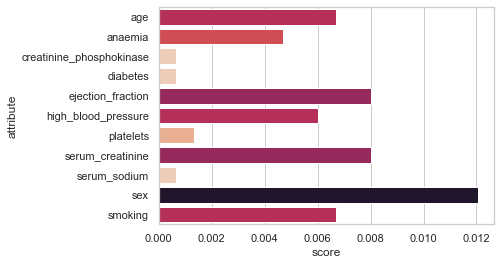

In [43]:
from sklearn.inspection import permutation_importance

knn1 = knn1.fit(X_train, y_train)
perm = permutation_importance(knn1, X_train, y_train, scoring= 'accuracy', n_jobs= -1, random_state= 20)

# get importance
importance = perm.importances_mean

selected_feature_perm = []
selected_feature_perm_time = []

# summarize feature importance
for i,v in enumerate(importance):
      
    if v > (max(importance)/2):
        selected_feature_perm.append(columns_name[i])
        selected_feature_perm_time.append(columns_name[i])
        
    print('%-40s Score: %-3.5f' % (columns_name[i], v))

selected_feature_perm_time.append('time')
    
# plot feature importance
plot_importance(columns_name, importance)

In [44]:
X_train_perm = X_train[selected_feature_perm]

evaluate_models(X_train_perm, y_train, 'Permutation')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.779 (0.046)
Decision Tree Classifier         : 0.706 (0.062)
Naive Bayes Classifier           : 0.716 (0.050)
Random Forest                    : 0.732 (0.062)
Support Vector Machine           : 0.769 (0.077)
K-Nearest-Neighbor               : 0.712 (0.048)
AdaBoost Classifier              : 0.726 (0.058)
Gradient Boosting Classifier     : 0.756 (0.083)
XGB Classifier                   : 0.742 (0.057)
ExtraTreesClassifier             : 0.742 (0.067)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.772 (0.069)
Decision Tree Classifier         : 0.668 (0.065)
Naive Bayes Classifier           : 0.681 (0.154)
Random Forest                    : 0.699 (0.093)
Support Vector Machine           : 0.746 (0.100)
K-Nearest-Neighbor               : 0.681 (0.158)
AdaBoost Classifier              : 0.693 (0.089)
Gradient Boosting Classifier     : 0.725 (0.11

#### RFE

In [45]:
# RFE
from sklearn.feature_selection import RFE

for index in range(len(columns_name)):
    
    selector = RFE(dt1, n_features_to_select = index+1, step = 1)
    selector = selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
        
    print('Selected number of features: ', index+1)
    
    for i in range(X_train.shape[1]):

        if selector.support_[i]:
            print('%s,' % (columns_name[i]), end =" ")
    
    print('\n')
    print('Accuracy:')
    models(X_train_rfe, y_train)

    print('\n')

Selected number of features:  1
platelets, 

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.679 (0.015)
Decision Tree Classifier         : 0.616 (0.068)
Naive Bayes Classifier           : 0.676 (0.014)
Random Forest                    : 0.672 (0.032)
Support Vector Machine           : 0.679 (0.015)
K-Nearest-Neighbor               : 0.662 (0.038)
AdaBoost Classifier              : 0.676 (0.020)
Gradient Boosting Classifier     : 0.629 (0.063)
XGB Classifier                   : 0.672 (0.028)
ExtraTreesClassifier             : 0.672 (0.019)


Selected number of features:  2
platelets, serum_creatinine, 

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.696 (0.043)
Decision Tree Classifier         : 0.612 (0.079)
Naive Bayes Classifier           : 0.699 (0.047)
Random Forest                    : 0.736 (0.062)
Support Vector Machine           : 0.689 (0.030)
K-Nearest-Neighbor               : 0.

In [46]:
selected_feature_rfe = []
selected_feature_rfe_time = []

selector = RFE(dt1, n_features_to_select = 4, step = 1)
selector = selector.fit(X_train.values, y_train)

for i in range(X_train.shape[1]):
    if selector.support_[i]:
        selected_feature_rfe.append(columns_name[i])
        selected_feature_rfe_time.append(columns_name[i])

selected_feature_rfe_time.append('time')


In [47]:
X_train_rfe = X_train[selected_feature_rfe]

evaluate_models(X_train_rfe, y_train, 'RFE')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.763 (0.075)
Decision Tree Classifier         : 0.682 (0.072)
Naive Bayes Classifier           : 0.722 (0.056)
Random Forest                    : 0.736 (0.064)
Support Vector Machine           : 0.769 (0.067)
K-Nearest-Neighbor               : 0.752 (0.060)
AdaBoost Classifier              : 0.729 (0.053)
Gradient Boosting Classifier     : 0.735 (0.098)
XGB Classifier                   : 0.749 (0.045)
ExtraTreesClassifier             : 0.722 (0.071)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.749 (0.106)
Decision Tree Classifier         : 0.648 (0.072)
Naive Bayes Classifier           : 0.667 (0.145)
Random Forest                    : 0.706 (0.091)
Support Vector Machine           : 0.747 (0.091)
K-Nearest-Neighbor               : 0.728 (0.089)
AdaBoost Classifier              : 0.699 (0.080)
Gradient Boosting Classifier     : 0.694 (0.13

---
#### Ensemble

serum_creatinine                         Score: 0.30787
ejection_fraction                        Score: 0.24535
age                                      Score: 0.15867
serum_sodium                             Score: 0.10657
creatinine_phosphokinase                 Score: 0.07181
platelets                                Score: 0.06304
high_blood_pressure                      Score: 0.01298
anaemia                                  Score: 0.00991
sex                                      Score: 0.00974
smoking                                  Score: 0.00726
diabetes                                 Score: 0.00680


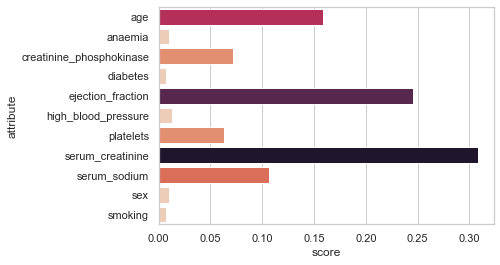

In [48]:
# Random Forest
rf1 = rf1.fit(X_train, y_train)


# get importance
importance = rf1.feature_importances_

selected_feature_ense = []
selected_feature_ense_time = []

max_value = max(importance)

impo = importance.copy()

# summarize feature importance
for i in range(0, len(columns_name)):
    
    for j, k in enumerate(impo):
        if max(impo) == k :
            
            if k > (max_value/2):
                selected_feature_ense.append(columns_name[j])
                selected_feature_ense_time.append(columns_name[j])
            
            print('%-40s Score: %-3.5f' % (columns_name[j], k))
            impo[j] = -1
            break
            
selected_feature_ense_time.append('time')
    
# plot feature importance
plot_importance(columns_name, importance)

In [49]:
X_train_ense = X_train[selected_feature_ense]
evaluate_models(X_train_ense, y_train, 'Ensemble')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.766 (0.074)
Decision Tree Classifier         : 0.739 (0.072)
Naive Bayes Classifier           : 0.729 (0.050)
Random Forest                    : 0.736 (0.051)
Support Vector Machine           : 0.769 (0.072)
K-Nearest-Neighbor               : 0.746 (0.090)
AdaBoost Classifier              : 0.726 (0.058)
Gradient Boosting Classifier     : 0.752 (0.080)
XGB Classifier                   : 0.749 (0.043)
ExtraTreesClassifier             : 0.729 (0.050)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.755 (0.106)
Decision Tree Classifier         : 0.704 (0.098)
Naive Bayes Classifier           : 0.683 (0.143)
Random Forest                    : 0.707 (0.072)
Support Vector Machine           : 0.749 (0.099)
K-Nearest-Neighbor               : 0.706 (0.144)
AdaBoost Classifier              : 0.693 (0.089)
Gradient Boosting Classifier     : 0.719 (0.09

#### Information Gain

age                                      Score: 0.05332
anaemia                                  Score: 0.05566
creatinine_phosphokinase                 Score: 0.04184
diabetes                                 Score: 0.00000
ejection_fraction                        Score: 0.05589
high_blood_pressure                      Score: 0.00000
platelets                                Score: 0.00000
serum_creatinine                         Score: 0.06627
serum_sodium                             Score: 0.06825
sex                                      Score: 0.00000
smoking                                  Score: 0.00000


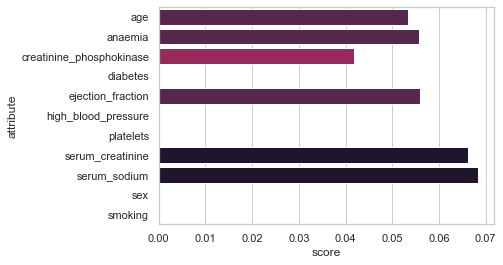

In [50]:
from sklearn.feature_selection import mutual_info_classif

# get importance
importance = mutual_info_classif(X_train, y_train, random_state= 66)

selected_feature_gain = []
selected_feature_gain_time = []

# summarize feature importance
for i,v in enumerate(importance):
      
    if v > (max(importance)/2):
        selected_feature_gain.append(columns_name[i])
        selected_feature_gain_time.append(columns_name[i])
        
    print('%-40s Score: %-3.5f' % (columns_name[i], v))

selected_feature_gain_time.append('time')
    
# plot feature importance
plot_importance(columns_name, importance)

In [51]:
X_train_gain = X_train[selected_feature_gain]
evaluate_models(X_train_gain, y_train, 'InfoGain')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.743 (0.087)
Decision Tree Classifier         : 0.662 (0.122)
Naive Bayes Classifier           : 0.703 (0.073)
Random Forest                    : 0.736 (0.068)
Support Vector Machine           : 0.749 (0.081)
K-Nearest-Neighbor               : 0.729 (0.069)
AdaBoost Classifier              : 0.726 (0.061)
Gradient Boosting Classifier     : 0.742 (0.086)
XGB Classifier                   : 0.715 (0.085)
ExtraTreesClassifier             : 0.742 (0.081)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.703 (0.126)
Decision Tree Classifier         : 0.626 (0.124)
Naive Bayes Classifier           : 0.638 (0.198)
Random Forest                    : 0.717 (0.130)
Support Vector Machine           : 0.715 (0.117)
K-Nearest-Neighbor               : 0.696 (0.132)
AdaBoost Classifier              : 0.692 (0.093)
Gradient Boosting Classifier     : 0.710 (0.11

#### Chi-square Test

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


for index in range(len(columns_name)):
    
    chi2_features = SelectKBest(chi2, index+1)
    X_train_chi2 = chi2_features.fit_transform(X_train, y_train)
    
    cols = columns_name[chi2_features.get_support(indices=True)]
    
    print('Selected number of features: ', index+1)
    for i in cols:
        print('%s,' % (i), end =" ")
        
    print('\n')
    print('Accuracy:')
    models(X_train_chi2, y_train)

    print('\n')

Selected number of features:  1
serum_creatinine, 

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.696 (0.043)
Decision Tree Classifier         : 0.712 (0.047)
Naive Bayes Classifier           : 0.699 (0.047)
Random Forest                    : 0.733 (0.063)
Support Vector Machine           : 0.689 (0.030)
K-Nearest-Neighbor               : 0.719 (0.088)
AdaBoost Classifier              : 0.753 (0.056)
Gradient Boosting Classifier     : 0.732 (0.070)
XGB Classifier                   : 0.729 (0.062)
ExtraTreesClassifier             : 0.722 (0.039)


Selected number of features:  2
age, serum_creatinine, 

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.719 (0.042)
Decision Tree Classifier         : 0.679 (0.066)
Naive Bayes Classifier           : 0.722 (0.041)
Random Forest                    : 0.749 (0.046)
Support Vector Machine           : 0.692 (0.036)
K-Nearest-Neighbor               : 0

In [53]:
chi2_features = SelectKBest(chi2, 4)
X_train_chi2 = chi2_features.fit_transform(X_train, y_train)

selected_feature_chi2 = []
selected_feature_chi2_time = []

cols = columns_name[chi2_features.get_support(indices=True)] 
    
for i in cols:
    selected_feature_chi2.append(i)
    selected_feature_chi2_time.append(i)

selected_feature_chi2_time.append('time')

In [54]:
X_train_chi2 = X_train[selected_feature_chi2]
evaluate_models(X_train_chi2, y_train, 'CHI2')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.759 (0.053)
Decision Tree Classifier         : 0.726 (0.066)
Naive Bayes Classifier           : 0.716 (0.057)
Random Forest                    : 0.729 (0.060)
Support Vector Machine           : 0.769 (0.065)
K-Nearest-Neighbor               : 0.742 (0.056)
AdaBoost Classifier              : 0.726 (0.058)
Gradient Boosting Classifier     : 0.749 (0.082)
XGB Classifier                   : 0.736 (0.053)
ExtraTreesClassifier             : 0.736 (0.071)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.745 (0.090)
Decision Tree Classifier         : 0.686 (0.079)
Naive Bayes Classifier           : 0.630 (0.178)
Random Forest                    : 0.694 (0.080)
Support Vector Machine           : 0.749 (0.094)
K-Nearest-Neighbor               : 0.720 (0.091)
AdaBoost Classifier              : 0.693 (0.089)
Gradient Boosting Classifier     : 0.710 (0.11

#### Fisher’s Score

serum_sodium                             Rank:  0
sex                                      Rank:  1
diabetes                                 Rank:  2
age                                      Rank:  3
serum_creatinine                         Rank:  4
ejection_fraction                        Rank:  5
anaemia                                  Rank:  6
smoking                                  Rank:  7
platelets                                Rank:  8
high_blood_pressure                      Rank:  9
creatinine_phosphokinase                 Rank: 10


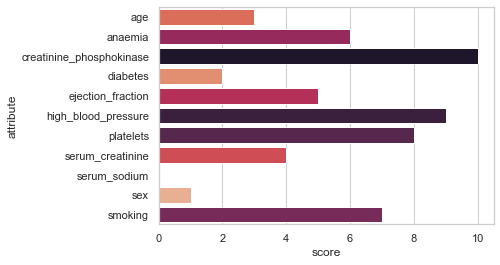

In [55]:
from skfeature.function.similarity_based.fisher_score import fisher_score

selected_feature_fish = []
selected_feature_fish_time = []

# get rank
rank = fisher_score(X_train.values, y_train) #returns rank directly instead of fisher score. so no need for feature_ranking
    

selected_feature_fish_time.append('time')


for i in range(0,len(columns_name)):
    
    condition = True
    
    for j, k in enumerate(rank):
        
        if k == i: 
            if i < (math.floor(len(columns_name)/2)):
                selected_feature_fish.append(columns_name[j])
                selected_feature_fish_time.append(columns_name[j])

            if condition:
                print('%-40s Rank: %2d' % (columns_name[j], k))
                condition = False


# plot feature importance
plot_importance(columns_name, rank)

In [56]:
X_train_fish = X_train[selected_feature_fish]
evaluate_models(X_train_fish, y_train, 'Fisher')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.722 (0.058)
Decision Tree Classifier         : 0.646 (0.081)
Naive Bayes Classifier           : 0.716 (0.055)
Random Forest                    : 0.746 (0.054)
Support Vector Machine           : 0.712 (0.052)
K-Nearest-Neighbor               : 0.709 (0.060)
AdaBoost Classifier              : 0.746 (0.056)
Gradient Boosting Classifier     : 0.742 (0.064)
XGB Classifier                   : 0.729 (0.064)
ExtraTreesClassifier             : 0.739 (0.063)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.728 (0.114)
Decision Tree Classifier         : 0.592 (0.090)
Naive Bayes Classifier           : 0.666 (0.194)
Random Forest                    : 0.756 (0.106)
Support Vector Machine           : 0.696 (0.176)
K-Nearest-Neighbor               : 0.584 (0.235)
AdaBoost Classifier              : 0.728 (0.098)
Gradient Boosting Classifier     : 0.719 (0.08

age                                      Score: 6.43395
anaemia                                  Score: 5.60000
creatinine_phosphokinase                 Score: 1.13539
diabetes                                 Score: 6.00000
ejection_fraction                        Score: 13.93333
high_blood_pressure                      Score: 2.60000
platelets                                Score: 1.99626
serum_creatinine                         Score: 5.37236
serum_sodium                             Score: 4.62857
sex                                      Score: 2.80000
smoking                                  Score: 2.00000


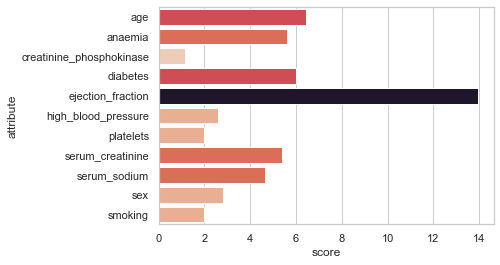

In [57]:
from skfeature.function.similarity_based.reliefF import reliefF

# get importance
importance = reliefF(X_train.values, y_train, mode='raw')

selected_feature_relief = []
selected_feature_relief_time = []

# summarize feature importance
for i,v in enumerate(importance):
      
    if v > (max(importance)/2):
        selected_feature_relief.append(columns_name[i])
        selected_feature_relief_time.append(columns_name[i])
        
    print('%-40s Score: %-3.5f' % (columns_name[i], v))

selected_feature_relief_time.append('time')

# plot feature importance
plot_importance(columns_name, importance)

In [58]:
X_train_relief = X_train[selected_feature_relief]
evaluate_models(X_train_relief, y_train, 'reliefF')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.736 (0.038)
Decision Tree Classifier         : 0.719 (0.035)
Naive Bayes Classifier           : 0.736 (0.038)
Random Forest                    : 0.726 (0.033)
Support Vector Machine           : 0.679 (0.015)
K-Nearest-Neighbor               : 0.702 (0.067)
AdaBoost Classifier              : 0.736 (0.038)
Gradient Boosting Classifier     : 0.739 (0.029)
XGB Classifier                   : 0.736 (0.028)
ExtraTreesClassifier             : 0.736 (0.038)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.804 (0.097)
Decision Tree Classifier         : 0.729 (0.113)
Naive Bayes Classifier           : 0.804 (0.097)
Random Forest                    : 0.755 (0.093)
Support Vector Machine           : 0.339 (0.008)
K-Nearest-Neighbor               : 0.684 (0.137)
AdaBoost Classifier              : 0.804 (0.097)
Gradient Boosting Classifier     : 0.710 (0.04

In [59]:
save_result('non_smote')

# Finish here then wait
# F wait

# With Follow time

In [60]:
# All attributes
evaluate_models(X_all, y_train, 'All')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.843 (0.061)
Decision Tree Classifier         : 0.799 (0.037)
Naive Bayes Classifier           : 0.773 (0.064)
Random Forest                    : 0.870 (0.075)
Support Vector Machine           : 0.840 (0.059)
K-Nearest-Neighbor               : 0.753 (0.074)
AdaBoost Classifier              : 0.853 (0.079)
Gradient Boosting Classifier     : 0.866 (0.056)
XGB Classifier                   : 0.877 (0.065)
ExtraTreesClassifier             : 0.840 (0.085)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.830 (0.071)
Decision Tree Classifier         : 0.775 (0.040)
Naive Bayes Classifier           : 0.773 (0.093)
Random Forest                    : 0.883 (0.073)
Support Vector Machine           : 0.832 (0.070)
K-Nearest-Neighbor               : 0.689 (0.236)
AdaBoost Classifier              : 0.854 (0.087)
Gradient Boosting Classifier     : 0.860 (0.05

#### Permutation Importance

In [61]:
# non smote t

X_train_perm = X_all[selected_feature_perm_time]

evaluate_models(X_train_perm, y_train,'Permutation')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.837 (0.081)
Decision Tree Classifier         : 0.783 (0.050)
Naive Bayes Classifier           : 0.796 (0.081)
Random Forest                    : 0.860 (0.064)
Support Vector Machine           : 0.840 (0.069)
K-Nearest-Neighbor               : 0.796 (0.064)
AdaBoost Classifier              : 0.867 (0.066)
Gradient Boosting Classifier     : 0.846 (0.076)
XGB Classifier                   : 0.853 (0.052)
ExtraTreesClassifier             : 0.847 (0.083)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.820 (0.097)
Decision Tree Classifier         : 0.754 (0.061)
Naive Bayes Classifier           : 0.807 (0.107)
Random Forest                    : 0.864 (0.055)
Support Vector Machine           : 0.822 (0.082)
K-Nearest-Neighbor               : 0.841 (0.091)
AdaBoost Classifier              : 0.864 (0.065)
Gradient Boosting Classifier     : 0.830 (0.08

#### RFE

In [62]:
X_train_rfe = X_all[selected_feature_rfe_time]

evaluate_models(X_train_rfe, y_train, 'RFE')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.830 (0.069)
Decision Tree Classifier         : 0.783 (0.067)
Naive Bayes Classifier           : 0.803 (0.081)
Random Forest                    : 0.850 (0.058)
Support Vector Machine           : 0.823 (0.066)
K-Nearest-Neighbor               : 0.816 (0.062)
AdaBoost Classifier              : 0.860 (0.063)
Gradient Boosting Classifier     : 0.853 (0.067)
XGB Classifier                   : 0.856 (0.063)
ExtraTreesClassifier             : 0.853 (0.083)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.811 (0.080)
Decision Tree Classifier         : 0.757 (0.080)
Naive Bayes Classifier           : 0.799 (0.107)
Random Forest                    : 0.851 (0.050)
Support Vector Machine           : 0.800 (0.076)
K-Nearest-Neighbor               : 0.828 (0.090)
AdaBoost Classifier              : 0.859 (0.062)
Gradient Boosting Classifier     : 0.838 (0.06

#### Ensemble

In [63]:
X_train_ense = X_all[selected_feature_ense_time]

evaluate_models(X_train_ense, y_train, 'Ensemble')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.830 (0.069)
Decision Tree Classifier         : 0.793 (0.049)
Naive Bayes Classifier           : 0.796 (0.078)
Random Forest                    : 0.850 (0.072)
Support Vector Machine           : 0.830 (0.067)
K-Nearest-Neighbor               : 0.830 (0.062)
AdaBoost Classifier              : 0.867 (0.066)
Gradient Boosting Classifier     : 0.843 (0.076)
XGB Classifier                   : 0.866 (0.054)
ExtraTreesClassifier             : 0.850 (0.078)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.811 (0.080)
Decision Tree Classifier         : 0.766 (0.059)
Naive Bayes Classifier           : 0.796 (0.101)
Random Forest                    : 0.842 (0.069)
Support Vector Machine           : 0.811 (0.078)
K-Nearest-Neighbor               : 0.827 (0.080)
AdaBoost Classifier              : 0.864 (0.065)
Gradient Boosting Classifier     : 0.823 (0.08

#### Gain

In [64]:
X_train_gain = X_all[selected_feature_gain_time]
evaluate_models(X_train_gain, y_train, 'InfoGain')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.837 (0.072)
Decision Tree Classifier         : 0.833 (0.079)
Naive Bayes Classifier           : 0.766 (0.068)
Random Forest                    : 0.863 (0.066)
Support Vector Machine           : 0.826 (0.057)
K-Nearest-Neighbor               : 0.813 (0.083)
AdaBoost Classifier              : 0.860 (0.076)
Gradient Boosting Classifier     : 0.867 (0.080)
XGB Classifier                   : 0.856 (0.068)
ExtraTreesClassifier             : 0.850 (0.076)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.821 (0.085)
Decision Tree Classifier         : 0.815 (0.090)
Naive Bayes Classifier           : 0.761 (0.109)
Random Forest                    : 0.865 (0.055)
Support Vector Machine           : 0.813 (0.072)
K-Nearest-Neighbor               : 0.824 (0.104)
AdaBoost Classifier              : 0.861 (0.081)
Gradient Boosting Classifier     : 0.853 (0.08

#### Chi

In [66]:
X_train_chi2 = X_all[selected_feature_chi2_time]
evaluate_models(X_train_chi2, y_train, 'CHI2')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.830 (0.069)
Decision Tree Classifier         : 0.783 (0.052)
Naive Bayes Classifier           : 0.816 (0.077)
Random Forest                    : 0.853 (0.058)
Support Vector Machine           : 0.833 (0.066)
K-Nearest-Neighbor               : 0.823 (0.047)
AdaBoost Classifier              : 0.867 (0.066)
Gradient Boosting Classifier     : 0.846 (0.076)
XGB Classifier                   : 0.853 (0.054)
ExtraTreesClassifier             : 0.853 (0.065)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.811 (0.080)
Decision Tree Classifier         : 0.752 (0.065)
Naive Bayes Classifier           : 0.810 (0.095)
Random Forest                    : 0.855 (0.048)
Support Vector Machine           : 0.814 (0.079)
K-Nearest-Neighbor               : 0.829 (0.063)
AdaBoost Classifier              : 0.864 (0.065)
Gradient Boosting Classifier     : 0.829 (0.08

#### Fish

In [67]:
X_train_fish = X_all[selected_feature_fish_time]
evaluate_models(X_train_fish, y_train, 'Fisher')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.827 (0.079)
Decision Tree Classifier         : 0.789 (0.087)
Naive Bayes Classifier           : 0.786 (0.069)
Random Forest                    : 0.853 (0.067)
Support Vector Machine           : 0.830 (0.072)
K-Nearest-Neighbor               : 0.773 (0.069)
AdaBoost Classifier              : 0.836 (0.072)
Gradient Boosting Classifier     : 0.847 (0.086)
XGB Classifier                   : 0.840 (0.059)
ExtraTreesClassifier             : 0.816 (0.067)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.817 (0.094)
Decision Tree Classifier         : 0.756 (0.109)
Naive Bayes Classifier           : 0.775 (0.100)
Random Forest                    : 0.845 (0.063)
Support Vector Machine           : 0.820 (0.084)
K-Nearest-Neighbor               : 0.781 (0.126)
AdaBoost Classifier              : 0.832 (0.075)
Gradient Boosting Classifier     : 0.825 (0.09

#### ReliefF

In [68]:
X_train_relief = X_all[selected_feature_relief_time]
evaluate_models(X_train_relief, y_train, 'reliefF')

Accuracy:
ZeroR                            : 0.679 (0.015)
Logistic Regression              : 0.833 (0.074)
Decision Tree Classifier         : 0.789 (0.066)
Naive Bayes Classifier           : 0.840 (0.074)
Random Forest                    : 0.840 (0.055)
Support Vector Machine           : 0.833 (0.074)
K-Nearest-Neighbor               : 0.853 (0.076)
AdaBoost Classifier              : 0.850 (0.056)
Gradient Boosting Classifier     : 0.863 (0.056)
XGB Classifier                   : 0.863 (0.048)
ExtraTreesClassifier             : 0.836 (0.067)


Precision:
ZeroR                            : 0.339 (0.008)
Logistic Regression              : 0.821 (0.088)
Decision Tree Classifier         : 0.762 (0.080)
Naive Bayes Classifier           : 0.827 (0.085)
Random Forest                    : 0.838 (0.055)
Support Vector Machine           : 0.822 (0.088)
K-Nearest-Neighbor               : 0.850 (0.086)
AdaBoost Classifier              : 0.854 (0.046)
Gradient Boosting Classifier     : 0.862 (0.04

In [69]:
save_result('non_smote_t')

---
# SMOTE
---

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_all_new, y_train_new = smote.fit_resample(X_all, y_train)

In [71]:
X_train_new = X_all_new.drop(columns=['time'])
X_train_new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.000000
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.000000
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.000000
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
401,0.191214,0.0,0.071319,0.0,0.346044,0.0,0.361392,0.167754,0.798697,1.0,0.000000
402,0.393064,0.0,0.187083,0.0,0.138811,0.0,0.327651,0.097575,0.672264,1.0,0.000000
403,0.663123,0.0,0.051869,0.0,0.319216,0.0,0.199377,0.144085,0.526706,0.0,0.000000
404,0.678566,1.0,0.035355,0.0,0.237029,1.0,0.287376,0.414122,0.540813,1.0,0.535775


In [72]:
y_train_new.value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

In [73]:
# All attributes
evaluate_models(X_train_new, y_train_new,'All')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.732 (0.056)
Decision Tree Classifier         : 0.719 (0.056)
Naive Bayes Classifier           : 0.643 (0.053)
Random Forest                    : 0.771 (0.045)
Support Vector Machine           : 0.732 (0.059)
K-Nearest-Neighbor               : 0.687 (0.090)
AdaBoost Classifier              : 0.761 (0.053)
Gradient Boosting Classifier     : 0.749 (0.033)
XGB Classifier                   : 0.774 (0.061)
ExtraTreesClassifier             : 0.803 (0.069)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.739 (0.058)
Decision Tree Classifier         : 0.721 (0.057)
Naive Bayes Classifier           : 0.672 (0.071)
Random Forest                    : 0.773 (0.044)
Support Vector Machine           : 0.740 (0.060)
K-Nearest-Neighbor               : 0.691 (0.091)
AdaBoost Classifier              : 0.765 (0.052)
Gradient Boosting Classifier     : 0.753 (0.03

#### Permutation Importance

In [74]:
# smote
X_train_perm = X_train_new[selected_feature_perm]

evaluate_models(X_train_perm, y_train_new, 'Permutation')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.732 (0.062)
Decision Tree Classifier         : 0.722 (0.066)
Naive Bayes Classifier           : 0.695 (0.038)
Random Forest                    : 0.769 (0.056)
Support Vector Machine           : 0.734 (0.065)
K-Nearest-Neighbor               : 0.712 (0.057)
AdaBoost Classifier              : 0.761 (0.042)
Gradient Boosting Classifier     : 0.739 (0.042)
XGB Classifier                   : 0.781 (0.039)
ExtraTreesClassifier             : 0.803 (0.064)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.740 (0.066)
Decision Tree Classifier         : 0.727 (0.071)
Naive Bayes Classifier           : 0.724 (0.044)
Random Forest                    : 0.771 (0.054)
Support Vector Machine           : 0.742 (0.067)
K-Nearest-Neighbor               : 0.723 (0.061)
AdaBoost Classifier              : 0.765 (0.040)
Gradient Boosting Classifier     : 0.743 (0.04

#### RFE

In [75]:
X_train_rfe = X_train_new[selected_feature_rfe]

evaluate_models(X_train_rfe, y_train_new, 'RFE')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.730 (0.055)
Decision Tree Classifier         : 0.722 (0.077)
Naive Bayes Classifier           : 0.710 (0.058)
Random Forest                    : 0.773 (0.047)
Support Vector Machine           : 0.734 (0.050)
K-Nearest-Neighbor               : 0.752 (0.057)
AdaBoost Classifier              : 0.754 (0.035)
Gradient Boosting Classifier     : 0.737 (0.049)
XGB Classifier                   : 0.771 (0.041)
ExtraTreesClassifier             : 0.800 (0.039)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.734 (0.057)
Decision Tree Classifier         : 0.730 (0.078)
Naive Bayes Classifier           : 0.734 (0.064)
Random Forest                    : 0.775 (0.046)
Support Vector Machine           : 0.741 (0.051)
K-Nearest-Neighbor               : 0.760 (0.061)
AdaBoost Classifier              : 0.758 (0.033)
Gradient Boosting Classifier     : 0.740 (0.05

#### Ensemble

In [76]:
X_train_ense = X_train_new[selected_feature_ense]

evaluate_models(X_train_ense, y_train_new, 'Ensemble')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.732 (0.063)
Decision Tree Classifier         : 0.754 (0.052)
Naive Bayes Classifier           : 0.700 (0.026)
Random Forest                    : 0.773 (0.051)
Support Vector Machine           : 0.734 (0.052)
K-Nearest-Neighbor               : 0.751 (0.048)
AdaBoost Classifier              : 0.751 (0.035)
Gradient Boosting Classifier     : 0.744 (0.045)
XGB Classifier                   : 0.768 (0.040)
ExtraTreesClassifier             : 0.786 (0.045)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.737 (0.065)
Decision Tree Classifier         : 0.757 (0.050)
Naive Bayes Classifier           : 0.732 (0.038)
Random Forest                    : 0.776 (0.050)
Support Vector Machine           : 0.741 (0.052)
K-Nearest-Neighbor               : 0.756 (0.050)
AdaBoost Classifier              : 0.757 (0.035)
Gradient Boosting Classifier     : 0.746 (0.04

#### Gain

In [77]:
X_train_gain = X_train_new[selected_feature_gain]
evaluate_models(X_train_gain, y_train_new, 'InfoGain')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.749 (0.051)
Decision Tree Classifier         : 0.726 (0.066)
Naive Bayes Classifier           : 0.648 (0.061)
Random Forest                    : 0.776 (0.054)
Support Vector Machine           : 0.761 (0.045)
K-Nearest-Neighbor               : 0.727 (0.036)
AdaBoost Classifier              : 0.751 (0.053)
Gradient Boosting Classifier     : 0.754 (0.049)
XGB Classifier                   : 0.771 (0.044)
ExtraTreesClassifier             : 0.773 (0.065)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.756 (0.050)
Decision Tree Classifier         : 0.730 (0.068)
Naive Bayes Classifier           : 0.684 (0.072)
Random Forest                    : 0.777 (0.054)
Support Vector Machine           : 0.765 (0.047)
K-Nearest-Neighbor               : 0.731 (0.039)
AdaBoost Classifier              : 0.754 (0.052)
Gradient Boosting Classifier     : 0.755 (0.04

#### Chi

In [78]:
X_train_chi2 = X_train_new[selected_feature_chi2]
evaluate_models(X_train_chi2, y_train_new, 'CHI2')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.734 (0.061)
Decision Tree Classifier         : 0.771 (0.075)
Naive Bayes Classifier           : 0.697 (0.043)
Random Forest                    : 0.773 (0.052)
Support Vector Machine           : 0.744 (0.057)
K-Nearest-Neighbor               : 0.761 (0.055)
AdaBoost Classifier              : 0.759 (0.032)
Gradient Boosting Classifier     : 0.741 (0.043)
XGB Classifier                   : 0.781 (0.040)
ExtraTreesClassifier             : 0.786 (0.053)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.740 (0.064)
Decision Tree Classifier         : 0.776 (0.074)
Naive Bayes Classifier           : 0.728 (0.046)
Random Forest                    : 0.776 (0.051)
Support Vector Machine           : 0.750 (0.060)
K-Nearest-Neighbor               : 0.765 (0.054)
AdaBoost Classifier              : 0.765 (0.032)
Gradient Boosting Classifier     : 0.745 (0.04

#### Fish

In [79]:
X_train_fish = X_train_new[selected_feature_fish]
evaluate_models(X_train_fish, y_train_new, 'Fisher')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.687 (0.036)
Decision Tree Classifier         : 0.655 (0.059)
Naive Bayes Classifier           : 0.650 (0.045)
Random Forest                    : 0.704 (0.039)
Support Vector Machine           : 0.700 (0.044)
K-Nearest-Neighbor               : 0.631 (0.086)
AdaBoost Classifier              : 0.690 (0.044)
Gradient Boosting Classifier     : 0.699 (0.049)
XGB Classifier                   : 0.734 (0.029)
ExtraTreesClassifier             : 0.724 (0.068)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.692 (0.037)
Decision Tree Classifier         : 0.659 (0.056)
Naive Bayes Classifier           : 0.684 (0.066)
Random Forest                    : 0.708 (0.038)
Support Vector Machine           : 0.705 (0.046)
K-Nearest-Neighbor               : 0.640 (0.093)
AdaBoost Classifier              : 0.694 (0.044)
Gradient Boosting Classifier     : 0.702 (0.04

#### ReliefF

In [80]:
X_train_relief = X_train_new[selected_feature_relief]
evaluate_models(X_train_relief, y_train_new, 'reliefF')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.609 (0.065)
Decision Tree Classifier         : 0.769 (0.052)
Naive Bayes Classifier           : 0.604 (0.063)
Random Forest                    : 0.692 (0.060)
Support Vector Machine           : 0.604 (0.063)
K-Nearest-Neighbor               : 0.683 (0.054)
AdaBoost Classifier              : 0.646 (0.055)
Gradient Boosting Classifier     : 0.667 (0.067)
XGB Classifier                   : 0.769 (0.053)
ExtraTreesClassifier             : 0.739 (0.062)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.611 (0.066)
Decision Tree Classifier         : 0.788 (0.049)
Naive Bayes Classifier           : 0.606 (0.064)
Random Forest                    : 0.722 (0.067)
Support Vector Machine           : 0.606 (0.064)
K-Nearest-Neighbor               : 0.754 (0.075)
AdaBoost Classifier              : 0.670 (0.064)
Gradient Boosting Classifier     : 0.681 (0.07

In [81]:
save_result('after_smote')

# With Follow up

In [82]:
# All attributes
evaluate_models(X_all_new, y_train_new, 'All')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.808 (0.061)
Decision Tree Classifier         : 0.813 (0.040)
Naive Bayes Classifier           : 0.791 (0.046)
Random Forest                    : 0.847 (0.039)
Support Vector Machine           : 0.813 (0.059)
K-Nearest-Neighbor               : 0.734 (0.065)
AdaBoost Classifier              : 0.850 (0.054)
Gradient Boosting Classifier     : 0.850 (0.047)
XGB Classifier                   : 0.862 (0.037)
ExtraTreesClassifier             : 0.869 (0.047)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.818 (0.058)
Decision Tree Classifier         : 0.819 (0.043)
Naive Bayes Classifier           : 0.806 (0.049)
Random Forest                    : 0.857 (0.042)
Support Vector Machine           : 0.820 (0.056)
K-Nearest-Neighbor               : 0.738 (0.068)
AdaBoost Classifier              : 0.857 (0.053)
Gradient Boosting Classifier     : 0.857 (0.04

#### Permutation Importance

In [83]:
# smote t
X_train_perm = X_all_new[selected_feature_perm_time]

evaluate_models(X_train_perm, y_train_new, 'Permutation')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.813 (0.066)
Decision Tree Classifier         : 0.825 (0.041)
Naive Bayes Classifier           : 0.808 (0.067)
Random Forest                    : 0.837 (0.025)
Support Vector Machine           : 0.815 (0.053)
K-Nearest-Neighbor               : 0.818 (0.075)
AdaBoost Classifier              : 0.852 (0.044)
Gradient Boosting Classifier     : 0.847 (0.032)
XGB Classifier                   : 0.857 (0.033)
ExtraTreesClassifier             : 0.870 (0.048)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.821 (0.061)
Decision Tree Classifier         : 0.831 (0.041)
Naive Bayes Classifier           : 0.815 (0.067)
Random Forest                    : 0.846 (0.028)
Support Vector Machine           : 0.822 (0.050)
K-Nearest-Neighbor               : 0.826 (0.067)
AdaBoost Classifier              : 0.863 (0.044)
Gradient Boosting Classifier     : 0.854 (0.03

#### RFE

In [84]:
X_train_rfe = X_all_new[selected_feature_rfe_time]

evaluate_models(X_train_rfe, y_train_new, 'RFE')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.810 (0.065)
Decision Tree Classifier         : 0.781 (0.064)
Naive Bayes Classifier           : 0.801 (0.062)
Random Forest                    : 0.850 (0.030)
Support Vector Machine           : 0.810 (0.051)
K-Nearest-Neighbor               : 0.835 (0.064)
AdaBoost Classifier              : 0.848 (0.043)
Gradient Boosting Classifier     : 0.835 (0.033)
XGB Classifier                   : 0.867 (0.027)
ExtraTreesClassifier             : 0.857 (0.039)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.817 (0.061)
Decision Tree Classifier         : 0.785 (0.064)
Naive Bayes Classifier           : 0.811 (0.063)
Random Forest                    : 0.858 (0.034)
Support Vector Machine           : 0.817 (0.050)
K-Nearest-Neighbor               : 0.843 (0.056)
AdaBoost Classifier              : 0.858 (0.045)
Gradient Boosting Classifier     : 0.844 (0.03

#### Ensemble

In [85]:
X_train_ense = X_all_new[selected_feature_ense_time]

evaluate_models(X_train_ense, y_train_new, 'Ensemble')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.813 (0.078)
Decision Tree Classifier         : 0.822 (0.042)
Naive Bayes Classifier           : 0.813 (0.056)
Random Forest                    : 0.850 (0.030)
Support Vector Machine           : 0.818 (0.061)
K-Nearest-Neighbor               : 0.833 (0.043)
AdaBoost Classifier              : 0.850 (0.043)
Gradient Boosting Classifier     : 0.842 (0.029)
XGB Classifier                   : 0.857 (0.037)
ExtraTreesClassifier             : 0.865 (0.038)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.818 (0.075)
Decision Tree Classifier         : 0.828 (0.044)
Naive Bayes Classifier           : 0.822 (0.056)
Random Forest                    : 0.859 (0.034)
Support Vector Machine           : 0.824 (0.060)
K-Nearest-Neighbor               : 0.841 (0.042)
AdaBoost Classifier              : 0.861 (0.043)
Gradient Boosting Classifier     : 0.850 (0.03

#### Gain

In [86]:
X_train_gain = X_all_new[selected_feature_gain_time]
evaluate_models(X_train_gain, y_train_new, 'InfoGain')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.800 (0.077)
Decision Tree Classifier         : 0.807 (0.055)
Naive Bayes Classifier           : 0.798 (0.047)
Random Forest                    : 0.855 (0.032)
Support Vector Machine           : 0.805 (0.054)
K-Nearest-Neighbor               : 0.833 (0.046)
AdaBoost Classifier              : 0.852 (0.046)
Gradient Boosting Classifier     : 0.855 (0.046)
XGB Classifier                   : 0.862 (0.046)
ExtraTreesClassifier             : 0.877 (0.043)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.809 (0.074)
Decision Tree Classifier         : 0.816 (0.051)
Naive Bayes Classifier           : 0.815 (0.044)
Random Forest                    : 0.862 (0.032)
Support Vector Machine           : 0.814 (0.051)
K-Nearest-Neighbor               : 0.839 (0.044)
AdaBoost Classifier              : 0.861 (0.047)
Gradient Boosting Classifier     : 0.863 (0.04

#### Chi

In [87]:
X_train_chi2 = X_all_new[selected_feature_chi2_time]
evaluate_models(X_train_chi2, y_train_new, 'CHI2')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.808 (0.070)
Decision Tree Classifier         : 0.822 (0.043)
Naive Bayes Classifier           : 0.806 (0.056)
Random Forest                    : 0.847 (0.026)
Support Vector Machine           : 0.813 (0.062)
K-Nearest-Neighbor               : 0.835 (0.058)
AdaBoost Classifier              : 0.850 (0.043)
Gradient Boosting Classifier     : 0.842 (0.031)
XGB Classifier                   : 0.872 (0.026)
ExtraTreesClassifier             : 0.855 (0.035)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.815 (0.066)
Decision Tree Classifier         : 0.829 (0.043)
Naive Bayes Classifier           : 0.814 (0.058)
Random Forest                    : 0.857 (0.032)
Support Vector Machine           : 0.818 (0.061)
K-Nearest-Neighbor               : 0.844 (0.053)
AdaBoost Classifier              : 0.861 (0.043)
Gradient Boosting Classifier     : 0.851 (0.02

#### Fish

In [88]:
X_train_fish = X_all_new[selected_feature_fish_time]
evaluate_models(X_train_fish, y_train_new, 'Fisher')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.776 (0.032)
Decision Tree Classifier         : 0.803 (0.036)
Naive Bayes Classifier           : 0.783 (0.032)
Random Forest                    : 0.828 (0.052)
Support Vector Machine           : 0.773 (0.023)
K-Nearest-Neighbor               : 0.763 (0.045)
AdaBoost Classifier              : 0.833 (0.045)
Gradient Boosting Classifier     : 0.828 (0.044)
XGB Classifier                   : 0.870 (0.038)
ExtraTreesClassifier             : 0.828 (0.039)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.779 (0.031)
Decision Tree Classifier         : 0.813 (0.037)
Naive Bayes Classifier           : 0.788 (0.032)
Random Forest                    : 0.839 (0.050)
Support Vector Machine           : 0.778 (0.022)
K-Nearest-Neighbor               : 0.778 (0.040)
AdaBoost Classifier              : 0.844 (0.046)
Gradient Boosting Classifier     : 0.839 (0.04

#### ReliefF

In [89]:
X_train_relief = X_all_new[selected_feature_relief_time]
evaluate_models(X_train_relief, y_train_new, 'reliefF')

Accuracy:
ZeroR                            : 0.493 (0.006)
Logistic Regression              : 0.751 (0.065)
Decision Tree Classifier         : 0.822 (0.047)
Naive Bayes Classifier           : 0.731 (0.062)
Random Forest                    : 0.830 (0.048)
Support Vector Machine           : 0.744 (0.067)
K-Nearest-Neighbor               : 0.815 (0.055)
AdaBoost Classifier              : 0.825 (0.053)
Gradient Boosting Classifier     : 0.808 (0.063)
XGB Classifier                   : 0.832 (0.049)
ExtraTreesClassifier             : 0.830 (0.047)


Precision:
ZeroR                            : 0.246 (0.003)
Logistic Regression              : 0.760 (0.065)
Decision Tree Classifier         : 0.830 (0.047)
Naive Bayes Classifier           : 0.740 (0.064)
Random Forest                    : 0.837 (0.050)
Support Vector Machine           : 0.752 (0.068)
K-Nearest-Neighbor               : 0.826 (0.054)
AdaBoost Classifier              : 0.832 (0.054)
Gradient Boosting Classifier     : 0.815 (0.06

In [90]:
save_result('after_smote_t')